In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [7]:
data = pd.read_csv("./income.csv")
df = pd.DataFrame(data)

In [94]:
x = df.iloc[:,1] #converting Age column to X-axis data
y = df.iloc[:,2] #converting Income column to Y-axis data
K_data = df.iloc[:,1:3]

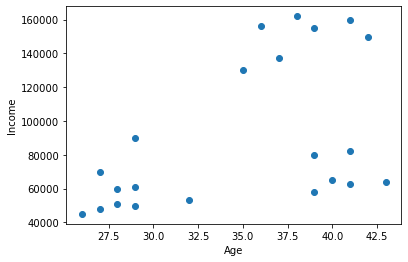

In [84]:
#creating a scatter plot
plt.xlabel('Age')
plt.ylabel('Income')
plt.scatter(x,y)

In [124]:
#we can observe there are 3 segments on the Scattered Plot, so we'll use 3 Clusters.
Kmean = KMeans(n_clusters=3) 
Kmean.fit(K_data)

KMeans(n_clusters=3)

In [130]:
#fitting and predicting, using our model.
predicted_y_values = Kmean.fit_predict(K_data)
#appending these predicted values to our dataframe
K_data['cluster'] = predicted_y_values
K_data.head()
#we need a way to visualise these seperate clusters distinctly on a Scatter Plot.
#So we create seperate DataFrames for these clusters

,Age,Income($),cluster
0,27,70000,2
1,29,90000,2
2,29,61000,0
3,28,60000,0
4,42,150000,1


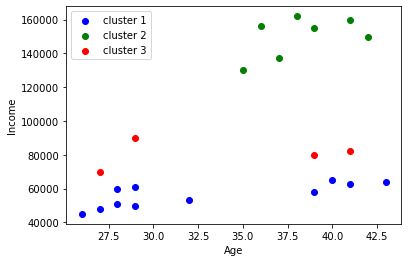

In [135]:
#making a seperate dataframe for 3 seperate clusters
df1 = K_data[K_data.cluster == 0]
df2 = K_data[K_data.cluster == 1]
df3 = K_data[K_data.cluster == 2]
plt.xlabel('Age')
plt.ylabel('Income')
plt.scatter(df1.Age,df1['Income($)'],color='blue',label="cluster 1")
plt.scatter(df2.Age,df2['Income($)'],color='green',label="cluster 2")
plt.scatter(df3.Age,df3['Income($)'],color='red',label="cluster 3")
plt.legend()

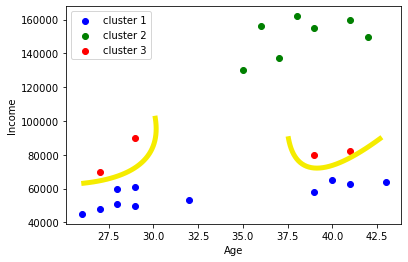

In [138]:
from IPython.display import Image
Image("ambiguity.png")
#There's ambiguity in the Scatter Plot.
#This resulted because of Improper Scaling of feature set.
#We will have to resolve this before clustering.

In [151]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


scaler.fit(K_data[['Income($)']])
K_data[['Income($)']] = scaler.transform(K_data[['Income($)']])

scaler.fit(K_data[['Age']])
K_data[['Age']] = scaler.transform(K_data[['Age']])

K_data.head()

,Age,Income($),cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1


In [152]:
#Age and Income are both scaled between 0 and 1 now.

In [155]:
#Training this new dataset
Kmean = KMeans(n_clusters=3)
predicted_y_values = Kmean.fit_predict(K_data[['Age','Income($)']])
K_data['cluster'] = predicted_y_values
K_data.head()

,Age,Income($),cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0


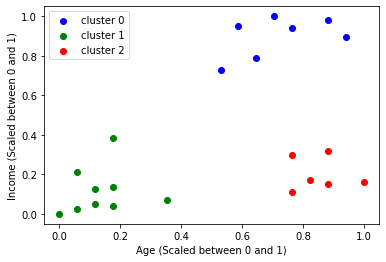

In [166]:
#Plotting the scaled data on Scatter Plot 

df1 = K_data[K_data.cluster == 0]
df2 = K_data[K_data.cluster == 1]
df3 = K_data[K_data.cluster == 2]
plt.xlabel('Age (Scaled between 0 and 1)')
plt.ylabel('Income (Scaled between 0 and 1)')
plt.scatter(df1.Age,df1['Income($)'],color='blue',label="cluster 0")
plt.scatter(df2.Age,df2['Income($)'],color='green',label="cluster 1")
plt.scatter(df3.Age,df3['Income($)'],color='red',label="cluster 2")
plt.legend()

#With appropriate scaling of data, we have resolved the ambiguity.

In [158]:
#finding these clusters centers (Centroids)
Kmean.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

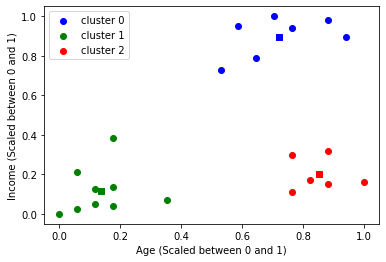

In [167]:
#plotting the Scaled Scatter Plots with Centroids
df1 = K_data[K_data.cluster == 0]
df2 = K_data[K_data.cluster == 1]
df3 = K_data[K_data.cluster == 2]
plt.xlabel('Age (Scaled between 0 and 1)')
plt.ylabel('Income (Scaled between 0 and 1)')
plt.scatter(df1.Age,df1['Income($)'],color='blue',label="cluster 0")
plt.scatter(df2.Age,df2['Income($)'],color='green',label="cluster 1")
plt.scatter(df3.Age,df3['Income($)'],color='red',label="cluster 2")
plt.scatter(0.72268908, 0.8974359, marker='s',c='b')
plt.scatter(0.1372549 , 0.11633428, marker='s',c='g')
plt.scatter(0.85294118, 0.2022792, marker='s',c='r')
plt.legend()

In [168]:
Kmean.labels_

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [169]:
#We infer
# 7 data points belong to cluster 0 (Blue)
# 9 data points belong to cluster 1 (Green)
# 6 data points belong to cluster 2 (Red)